# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# Pulling API key
from api_keys import weather_api_key

# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": datetime.datetime.fromtimestamp(city_date).strftime('%c')
                         })

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found")
        print(e)
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kenora
{'coord': {'lon': -94.4337, 'lat': 49.8167}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 20.54, 'feels_like': 20.82, 'temp_min': 20.43, 'temp_max': 20.54, 'pressure': 1014, 'humidity': 83, 'sea_level': 1014, 'grnd_level': 974}, 'visibility': 9656, 'wind': {'speed': 3.6, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1721695012, 'sys': {'type': 1, 'id': 894, 'country': 'CA', 'sunrise': 1721644499, 'sunset': 1721700784}, 'timezone': -18000, 'id': 5991056, 'name': 'Kenora', 'cod': 200}
Processing Record 2 of Set 1 | edinburgh of the seven seas
{'coord': {'lon': -12.3116, 'lat': -37.0676}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12.93, 'feels_like': 12.32, 'temp_min': 12.93, 'temp_max': 12.93, 'pressure': 1014, 'humidity': 78, 'sea_level': 10

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kenora,49.8167,-94.4337,20.54,83,100,3.60,CA,Mon Jul 22 18:36:52 2024
1,edinburgh of the seven seas,-37.0676,-12.3116,12.93,78,100,10.82,SH,Mon Jul 22 18:36:54 2024
2,papatowai,-46.5619,169.4708,9.50,74,94,3.99,NZ,Mon Jul 22 18:36:55 2024
3,ushuaia,-54.8000,-68.3000,3.81,75,40,10.80,AR,Mon Jul 22 18:36:57 2024
4,port-aux-francais,-49.3500,70.2167,3.16,69,55,3.85,TF,Mon Jul 22 18:36:58 2024


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenora,49.8167,-94.4337,20.54,83,100,3.60,CA,Mon Jul 22 18:36:52 2024
1,edinburgh of the seven seas,-37.0676,-12.3116,12.93,78,100,10.82,SH,Mon Jul 22 18:36:54 2024
2,papatowai,-46.5619,169.4708,9.50,74,94,3.99,NZ,Mon Jul 22 18:36:55 2024
3,ushuaia,-54.8000,-68.3000,3.81,75,40,10.80,AR,Mon Jul 22 18:36:57 2024
4,port-aux-francais,-49.3500,70.2167,3.16,69,55,3.85,TF,Mon Jul 22 18:36:58 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

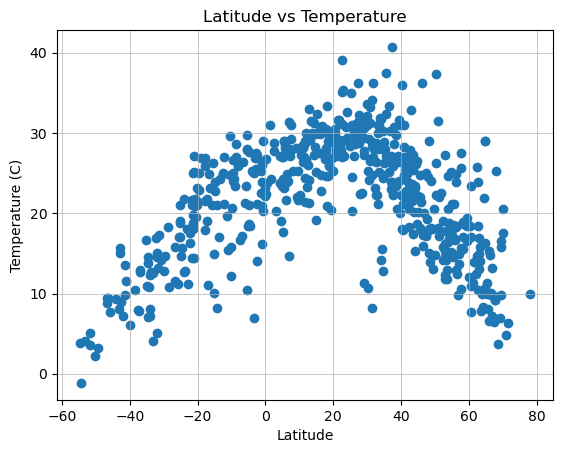

In [64]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Latitude vs Temperature')
plt.grid(linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

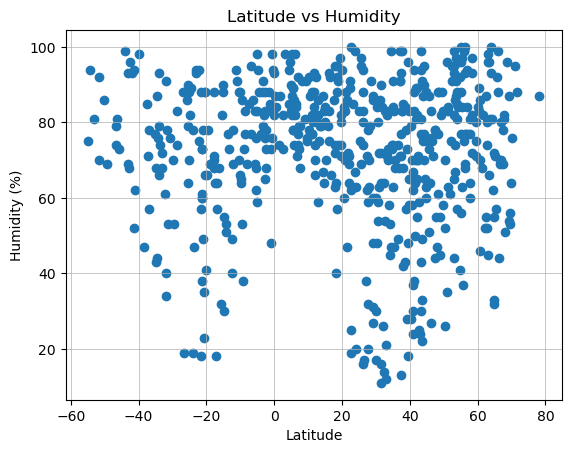

In [61]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity')
plt.grid(linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

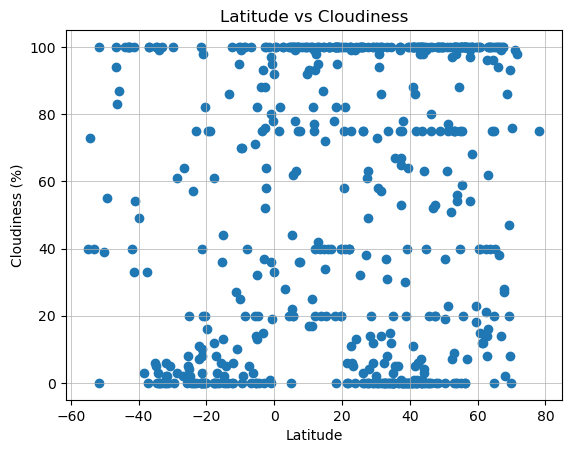

In [62]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness')
plt.grid(linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

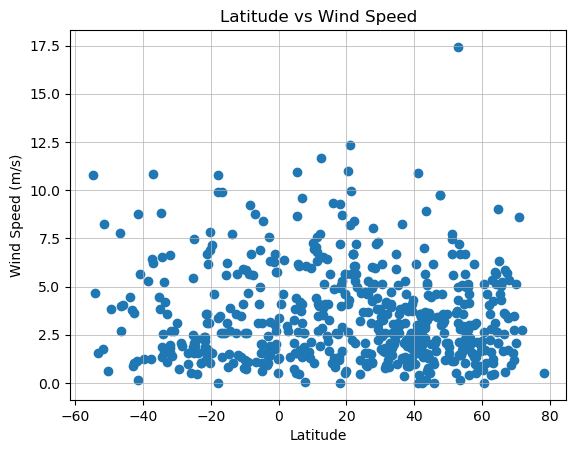

In [63]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')
plt.grid(linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def regress_f(x_values, y_values, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(linewidth = 0.5)
    plt.annotate(line_eq,(0.05,0.1),xycoords='axes fraction',fontsize = 10, color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenora,49.8167,-94.4337,20.54,83,100,3.60,CA,Mon Jul 22 18:36:52 2024
5,albany,42.6001,-73.9662,23.57,59,100,1.37,US,Mon Jul 22 18:34:32 2024
6,bethel,41.3712,-73.4140,24.77,83,100,1.89,US,Mon Jul 22 18:37:01 2024
9,bakchar,57.0186,82.0711,13.68,94,100,1.57,RU,Mon Jul 22 18:37:06 2024
11,williamsport,41.2412,-77.0011,22.28,94,100,0.00,US,Mon Jul 22 18:37:08 2024


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,12.93,78,100,10.82,SH,Mon Jul 22 18:36:54 2024
2,papatowai,-46.5619,169.4708,9.50,74,94,3.99,NZ,Mon Jul 22 18:36:55 2024
3,ushuaia,-54.8000,-68.3000,3.81,75,40,10.80,AR,Mon Jul 22 18:36:57 2024
4,port-aux-francais,-49.3500,70.2167,3.16,69,55,3.85,TF,Mon Jul 22 18:36:58 2024
7,port mathurin,-19.6833,63.4167,22.84,66,16,7.17,MU,Mon Jul 22 18:37:03 2024


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3918260687993618


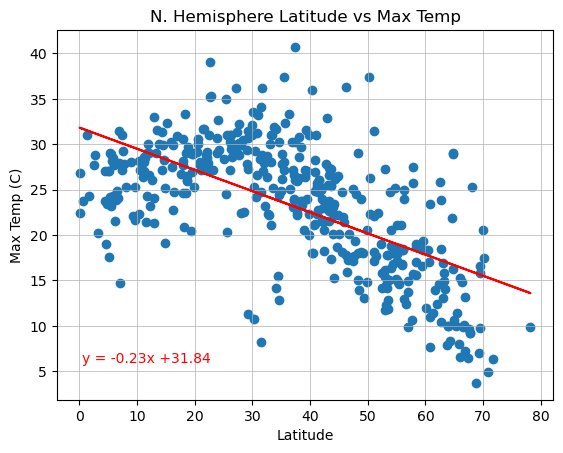

In [105]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
y_label = "Max Temp (C)"
title = "N. Hemisphere Latitude vs Max Temp"
regress_f(x_values,y_values,y_label,title)

The r-value is: 0.5866530379693675


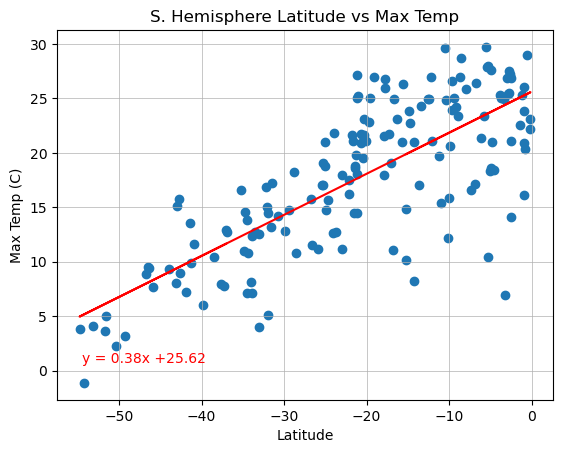

In [106]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
y_label = "Max Temp (C)"
title = "S. Hemisphere Latitude vs Max Temp"
regress_f(x_values,y_values,y_label,title)

**Discussion about the linear relationship:** 
Both graphs display the the smaller the absolute value of the city's latitude, the hotter the max temperature becomes. If both of these graphs were laid side by side, we would see the regression lines rise to meet in the middle.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005185292136479837


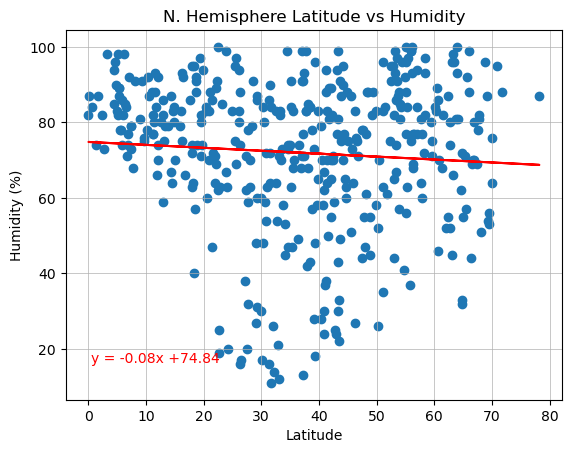

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
y_label = "Humidity (%)"
title = "N. Hemisphere Latitude vs Humidity"
regress_f(x_values,y_values,y_label,title)

The r-value is: 0.0006365707666030243


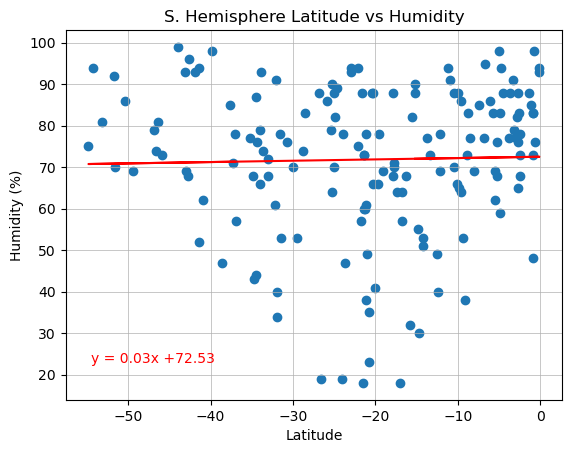

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
y_label = "Humidity (%)"
title = "S. Hemisphere Latitude vs Humidity"
regress_f(x_values,y_values,y_label,title)

**Discussion about the linear relationship:** 
There appears to be very little correlation between humidity and latitude in either hemisphere. Proximity to coastline or other major bodies of water would most likely be a higher correlation than straightforward geopositional data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0021463145233566678


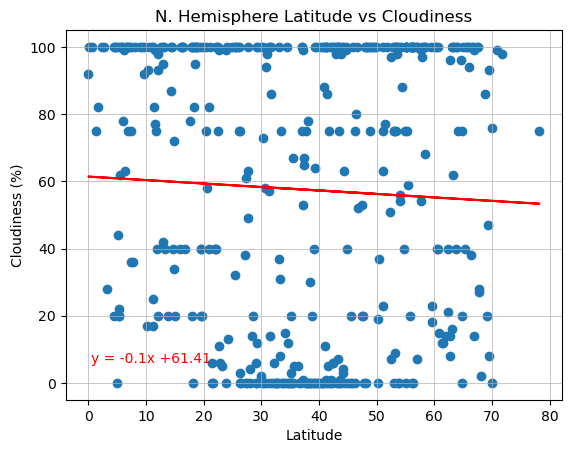

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
y_label = "Cloudiness (%)"
title = "N. Hemisphere Latitude vs Cloudiness"
regress_f(x_values,y_values,y_label,title)

The r-value is: 0.002914300795899691


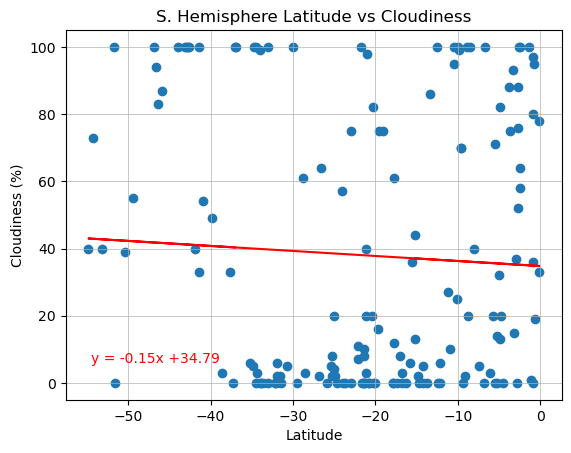

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
y_label = "Cloudiness (%)"
title = "S. Hemisphere Latitude vs Cloudiness"
regress_f(x_values,y_values,y_label,title)

**Discussion about the linear relationship:** 
Similar to the conclusions drawn about humidity, cloudiness is not directly correlated to latitude of the city in question.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02162978330470235


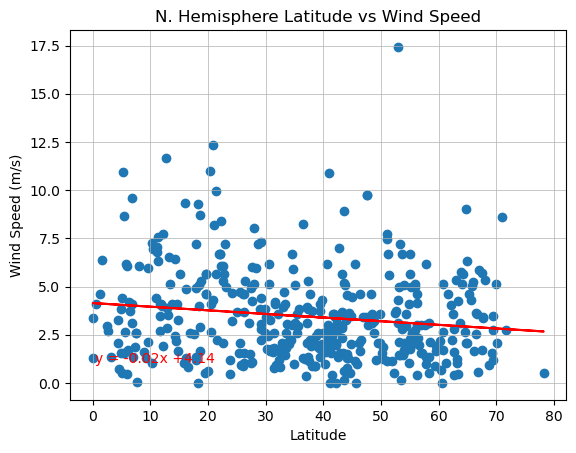

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
y_label = "Wind Speed (m/s)"
title = "N. Hemisphere Latitude vs Wind Speed"
regress_f(x_values,y_values,y_label,title)

The r-value is: 0.004307566364766946


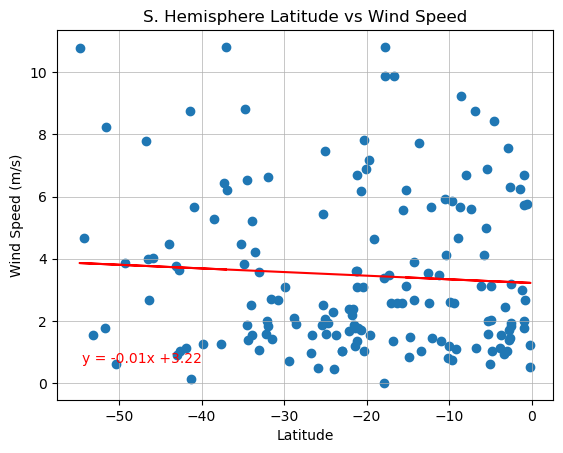

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
y_label = "Wind Speed (m/s)"
title = "S. Hemisphere Latitude vs Wind Speed"
regress_f(x_values,y_values,y_label,title)

**Discussion about the linear relationship:** Y
As with the previous two comparisons, Wind Speed and Latitude do not correlate with each other strongly, if at all. The most noticeable effect revealed is that the northen hemisphere has more cities analyzed in this data set.